In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [195]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [196]:
df.shape

(614, 13)

In [197]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [198]:
categorical = []
numerical = []
for i in df.columns:
    if df[i].dtype in ['object']: 
        categorical.append(i) 
    elif df[i].dtype in ['int64','float64']:
        numerical.append(i)    


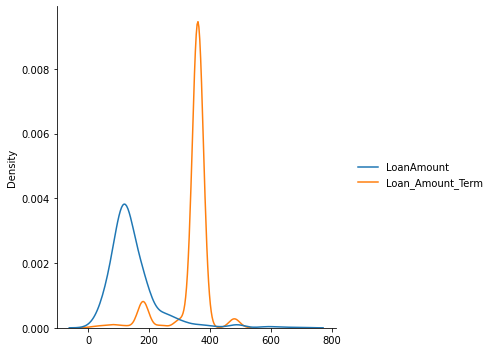

In [199]:
sns.displot(df[['LoanAmount','Loan_Amount_Term']], kind = 'kde')

In [200]:
df = df.dropna()

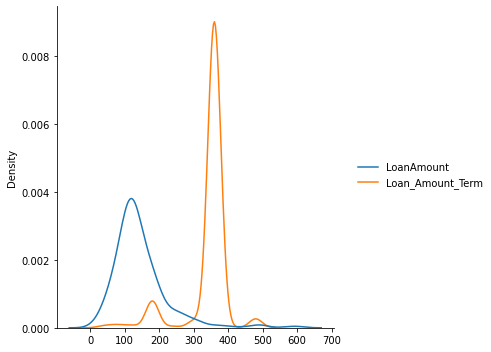

In [201]:
sns.displot(df[['LoanAmount','Loan_Amount_Term']], kind = 'kde')


In [202]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

In [203]:
df.Loan_Status.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [204]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [205]:
df['Dependents'] = df['Dependents'].replace({'3+':4})

In [206]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot: xlabel='Education', ylabel='count'>

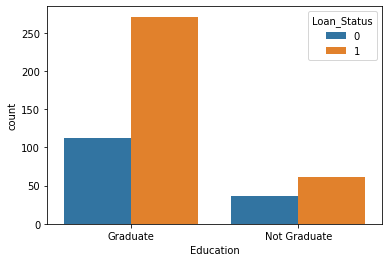

In [207]:
sns.countplot(x= 'Education', hue='Loan_Status', data=df)

<AxesSubplot: xlabel='Married', ylabel='count'>

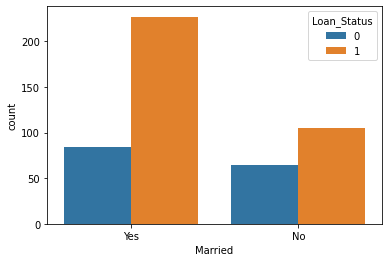

In [208]:
sns.countplot(x= 'Married', hue='Loan_Status', data = df)


<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

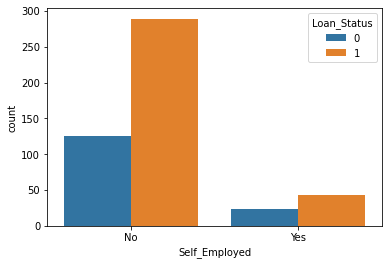

In [209]:
sns.countplot(x= 'Self_Employed', hue='Loan_Status', data = df)


In [210]:
df.replace({'Education':{'Graduate':1, 'Not Graduate':0},'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}}, inplace = True)

In [211]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [212]:
X = df.drop(['Loan_ID','Loan_Status'], axis = 1)
y = df['Loan_Status']

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 2, test_size = 0.1, stratify = y)

In [215]:
from sklearn import svm

In [216]:
model = svm.SVC(kernel = 'linear')

In [217]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [218]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [219]:
score = accuracy_score(y_true= y_test, y_pred = model.predict(X_test))

In [220]:
score

0.8333333333333334

<AxesSubplot: >

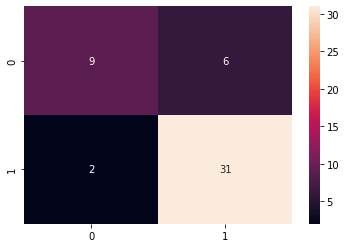

In [221]:
sns.heatmap(confusion_matrix(y_true= y_test, y_pred = model.predict(X_test)), annot=True)

In [222]:
f1_score = f1_score(y_true= y_test, y_pred = model.predict(X_test))
f1_score

0.8857142857142858

In [223]:
y_pred= model.predict(X_test)